## Libraries Import

In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOUJIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing Dataset

In [2]:
#Reading dataset
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")
Train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


## Text Cleaning

In [3]:
# Removing punctuation

exclude = set(string.punctuation)

def remove_punctuation(x):
    try:
        x = ''.join(ch for ch in x if ch not in exclude)
    except:
        pass
    return x

Train['text'] = Train['text'].apply(remove_punctuation)
Test['text'] = Test['text'].apply(remove_punctuation)
Train.head()

,text,label
0,I grew up b 1965 watching and loving the Thund...,0
1,When I put this movie in my DVD player and sat...,0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
# Removing stopwords

stop = stopwords.words('english')

Train['text'] = Train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Test['text'] = Test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
Train.head()

,text,label
0,I grew b 1965 watching loving Thunderbirds All...,0
1,When I put movie DVD player sat coke chips I e...,0
2,Why people know particular time past like feel...,0
3,Even though I great interest Biblical movies I...,0
4,Im die hard Dads Army fan nothing ever change ...,1


In [5]:
#remove special characters

def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', " ", str(text))
    return text
Train["text"] = Train["text"].apply(remove_special_characters)
Test["text"] = Test["text"].apply(remove_special_characters)
Train.head()

,text,label
0,I grew b 1965 watching loving Thunderbirds All...,0
1,When I put movie DVD player sat coke chips I e...,0
2,Why people know particular time past like feel...,0
3,Even though I great interest Biblical movies I...,0
4,Im die hard Dads Army fan nothing ever change ...,1


In [6]:
#remove html tags
def remove_html_tags(text):
    ht=""
    pattern=re.compile(r'<.*?>')
    return pattern.sub(r" " , text)
    res=re.sub(pattern,'',ht)
    return res
Train["text"] = Train["text"].apply(remove_html_tags)
Test["text"] = Test["text"].apply(remove_html_tags)
Train.head()

,text,label
0,I grew b 1965 watching loving Thunderbirds All...,0
1,When I put movie DVD player sat coke chips I e...,0
2,Why people know particular time past like feel...,0
3,Even though I great interest Biblical movies I...,0
4,Im die hard Dads Army fan nothing ever change ...,1


In [7]:
#remove URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r" ",text)
Train["text"] = Train["text"].apply(remove_URL)
Test["text"] = Test["text"].apply(remove_URL)
Train.head()

,text,label
0,I grew b 1965 watching loving Thunderbirds All...,0
1,When I put movie DVD player sat coke chips I e...,0
2,Why people know particular time past like feel...,0
3,Even though I great interest Biblical movies I...,0
4,Im die hard Dads Army fan nothing ever change ...,1


In [8]:
#remove emojis
def remove_emojis(data):
    emoj = re.compile("["
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
Train["text"]=Train["text"].apply(remove_emojis)
Test["text"]=Test["text"].apply(remove_emojis)
Train.head()

,text,label
0,I grew b 1965 watching loving Thunderbirds All...,0
1,When I put movie DVD player sat coke chips I e...,0
2,Why people know particular time past like feel...,0
3,Even though I great interest Biblical movies I...,0
4,Im die hard Dads Army fan nothing ever change ...,1


## Text Preprocessing

In [9]:
# Turnig all text to lowercase
Train['text'] = Train['text'].str.lower()
Test['text'] = Test['text'].str.lower()
Train.head()

,text,label
0,i grew b 1965 watching loving thunderbirds all...,0
1,when i put movie dvd player sat coke chips i e...,0
2,why people know particular time past like feel...,0
3,even though i great interest biblical movies i...,0
4,im die hard dads army fan nothing ever change ...,1


## Feature Engineering

In [10]:
# Split your data into training and testing sets
tfid = TfidfVectorizer()
X_train = tfid.fit_transform(Train["text"])
X_test = tfid.transform(Test["text"])
y_train = Train["label"]
y_test = Test["label"]

## Model Building

#### Linear regression

In [11]:
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [12]:
# Calculate Accuracy
accuracy1 = accuracy_score(y_true=y_test, y_pred=y_pred)
# Calculate Precision
precision = precision_score(y_true=y_test, y_pred=y_pred)

# Calculate Recall
recall = recall_score(y_true=y_test, y_pred=y_pred)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [13]:
print("Accuracy:", accuracy1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.8972
Precision: 0.8881091617933723
Recall: 0.9093812375249501
Confusion Matrix: [[2208  287]
 [ 227 2278]]


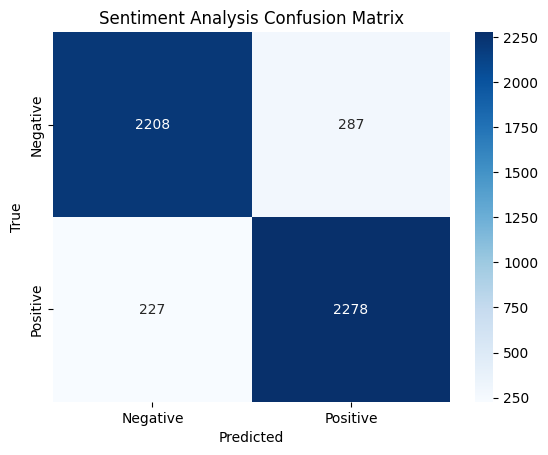

In [14]:
# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Sentiment Analysis Confusion Matrix')
plt.show()

#### K-Nearest Neighbours

In [15]:
#KNN
knn=KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
# Calculate Accuracy
accuracy2 = accuracy_score(y_true=y_test, y_pred=y_pred)

# Calculate Precision
precision = precision_score(y_true=y_test, y_pred=y_pred)

# Calculate Recall
recall = recall_score(y_true=y_test, y_pred=y_pred)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [17]:
print("Accuracy:", accuracy2)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.8972
Precision: 0.8881091617933723
Recall: 0.9093812375249501
Confusion Matrix: [[2208  287]
 [ 227 2278]]


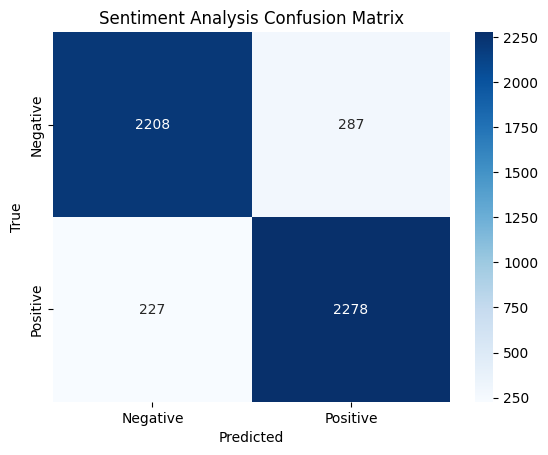

In [18]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Sentiment Analysis Confusion Matrix')
plt.show()

#### Naive Bayes

In [19]:
#Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train,y_train)
y_pred = naive_bayes_classifier.predict(X_test)

In [20]:
# Calculate Accuracy
accuracy3 = accuracy_score(y_true=y_test, y_pred=y_pred)

# Calculate Precision
precision = precision_score(y_true=y_test, y_pred=y_pred)

# Calculate Recall
recall = recall_score(y_true=y_test, y_pred=y_pred)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [21]:
print("Accuracy:", accuracy3)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:",conf_matrix)

Accuracy: 0.8712
Precision: 0.8818219121871153
Recall: 0.8578842315369262
Confusion Matrix: [[2207  288]
 [ 356 2149]]


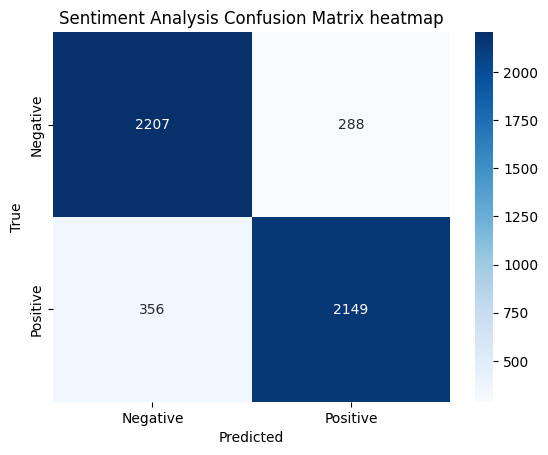

In [22]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Sentiment Analysis Confusion Matrix heatmap')
plt.show()

#### Comparisons of models accornding to accuracy score

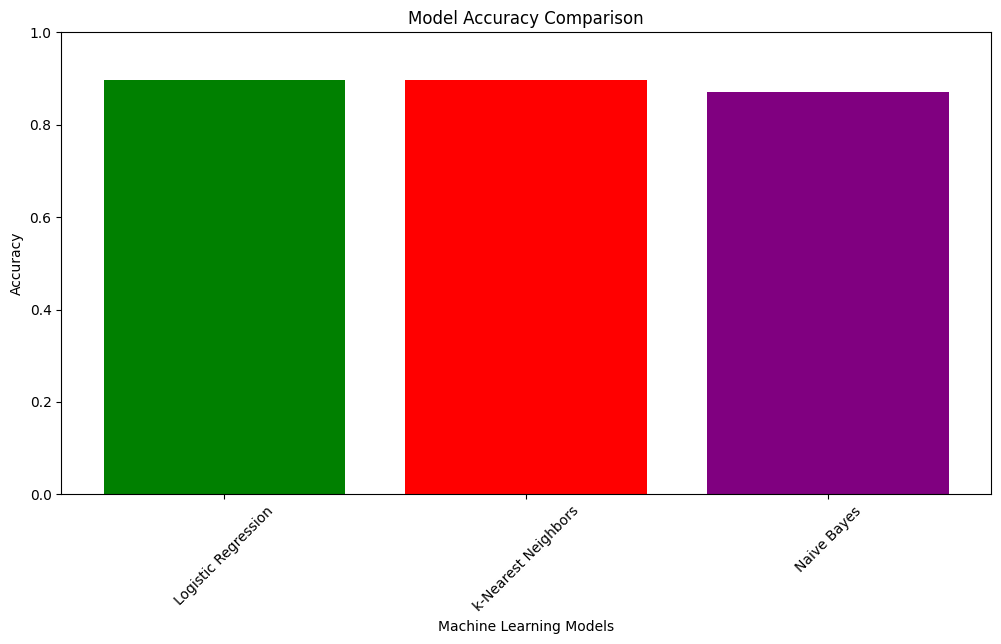

In [23]:
#Comparison of Models accuracy
model_names = ["Logistic Regression", "k-Nearest Neighbors" ,"Naive Bayes"]
accuracies = [accuracy1, accuracy2, accuracy3]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color=['green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set the y-axis limits
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.show()

### selecting Logistic Regression Model  for predicting output

In [24]:
#Sentiment of User Input function
def movie_review(review):
    review = review.lower()                      #lower case
    review = remove_punctuation(review)           #punctuation removal
    review = remove_special_characters(review)   #special character removal
    review = remove_html_tags(review)            #HTML tags removal
    review = remove_URL(review)                  #url removal
    review = remove_emojis(review)               #emojis removal
    review = tfid.transform([review])              #Tf Idf Vectorization
    pred = model.predict(review)
    return pred

In [29]:
#Sentiment analysis based on user input

public_review = input("REVIEW:\n")
sentiment = movie_review(public_review)
print("\nSentiment: ",end='')
if sentiment[0]==1:
    print("positive")
else:
    print("negative")

REVIEW:
Jawan is phenomenally entertaining and consistently engaging.  It's Stylish, slick and action-packed film which l has actions, thrills, patriotism and gripping storyline. Shahrukh Khan has once again bounced back after the super success of Pathan with a bang and has made his fans delighted.

Sentiment: positive
